### THE SPARKS FOUNDATION

## Exploratory Data Analysis - Terrorism

### Author: Paritosh Raikar

### For this task we are performing Exploratory Data Analysis on dataset of Global Terrorism.

### Objective :   To find out the hot zone of terrorism , As a security/defense analyst.

## Step 1: Importing all required librabries and Dataset.

In [1]:
# importing the libraries 
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import seaborn as sns

### Srep2: Reading  dataset

In [2]:
ter = pd.read_csv(r'F:\Neeyati\Project\globalterrorismdb_0718dist.csv')
print("Data retrieved sucessfullly")

C:\Users\Padmakumar\Anaconda3\envs\notebook\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Data retrieved sucessfullly


In [3]:
ter.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Step 3: Renameing some columns.

In [4]:
ter=ter.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'region_txt':'Region', 'provstate':'State','nwound':'Wound','nkill':'Killed','attacktype1_txt':'AttackType', 'targetype':'Target', 'gname':'Group','natlty1-txt':'nNationality' })

In [5]:
ter.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
ter.shape

(181691, 135)

In [7]:
ter.isnull().sum()

eventid            0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

### Some coloumns contain null values.

### Step 4: Extracting required coloumn .

In [8]:
a=ter[['Year','Month','Day','Country','State','Region','city','latitude','longitude','AttackType','Killed','Wound','Group','weaptype1_txt','targtype1_txt']]
a

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wound,Group,weaptype1_txt,targtype1_txt
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,MANO-D,Unknown,Private Citizens & Property
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,Unknown,Government (Diplomatic)
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Unknown,Unknown,Journalists & Media
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Unknown,Explosives,Government (Diplomatic)
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Unknown,Incendiary,Government (Diplomatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Al-Shabaab,Firearms,Military
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Muslim extremists,Explosives,Military
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,Private Citizens & Property
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Unknown,Explosives,Government (General)


## Step 5: Cheking for null value

In [9]:
a.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
State              421
Region               0
city               434
latitude          4556
longitude         4557
AttackType           0
Killed           10313
Wound            16311
Group                0
weaptype1_txt        0
targtype1_txt        0
dtype: int64

### Cheking basic statistics for extracting data.

In [10]:
a.describe()

,Year,Month,Day,latitude,longitude,Killed,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


### Step 6 : Correlatiom betwwen extracetd data using Heatmap.

<AxesSubplot:>

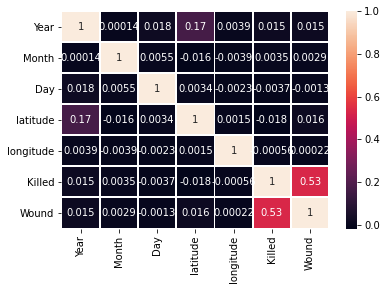

In [11]:
sns.heatmap(a.corr() , linecolor='white' , linewidth=1 , annot=True ,)

### Step 7: Finding top 20 countries with most Terrorist Attacks.

In [12]:
print('Country with the most attacks:\n',ter['Country'].value_counts().head(20))

Country with the most attacks:
 Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64


C:\Users\Padmakumar\Anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


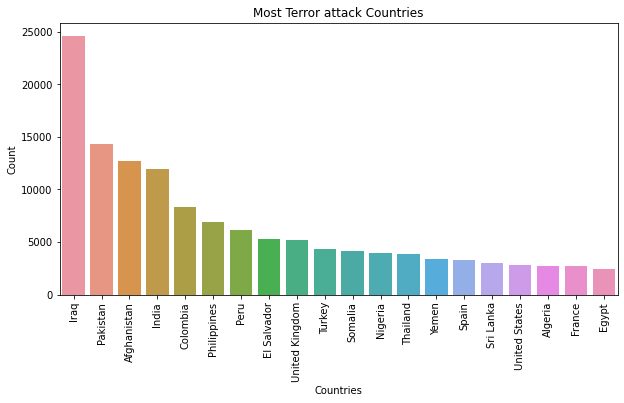

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(ter['Country'].value_counts()[:20].index,ter['Country'].value_counts()[:20].values)
plt.title("Most Terror attack Countries")
plt.xlabel("Countries")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

### Step 8 : Top five States with most terrorist Attacks.

In [14]:
print('Top 5 State with most terror attacks are:\n',ter['State'].value_counts().head(5))

Top 5 State with most terror attacks are:
 Baghdad             7645
Northern Ireland    4498
Unknown             4290
Balochistan         3710
Saladin             3411
Name: State, dtype: int64


C:\Users\Padmakumar\Anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


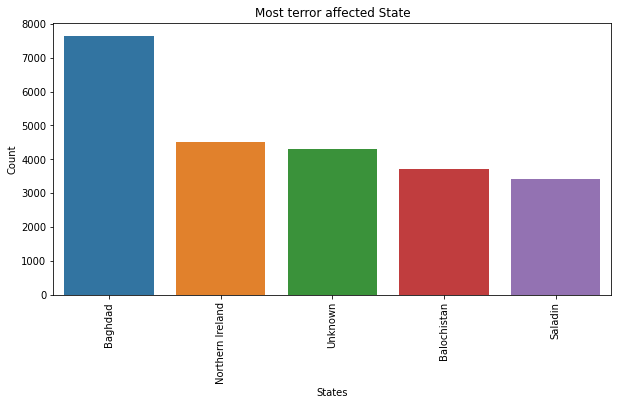

In [15]:
plt.figure(figsize=(10,5)) 
sns.barplot(ter['State'].value_counts()[:5].index,ter['State'].value_counts()[:5].values)
plt.title('Most terror affected State')
plt.xlabel("States")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Step 9 : Top 10 region with most terrorist Attacks. 

In [16]:
print('Region with most terror attacks:\n',ter['Region'].value_counts().head(10))

Region with most terror attacks:
 Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64


C:\Users\Padmakumar\Anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


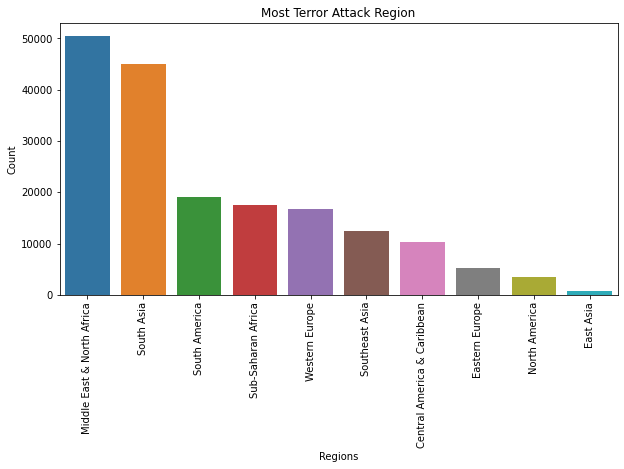

In [17]:
plt.figure (figsize=(10,5))
sns.barplot(ter['Region'].value_counts()[:10].index,ter['Region'].value_counts()[:10].values)
plt.title("Most Terror Attack Region")
plt.xlabel("Regions")
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Step : 10 Top 10 cities with most terrorist Attacks.

In [18]:
print('cities with terror attcks :\n',ter['city'].value_counts().head(10))

cities with terror attcks :
 Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64


C:\Users\Padmakumar\Anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


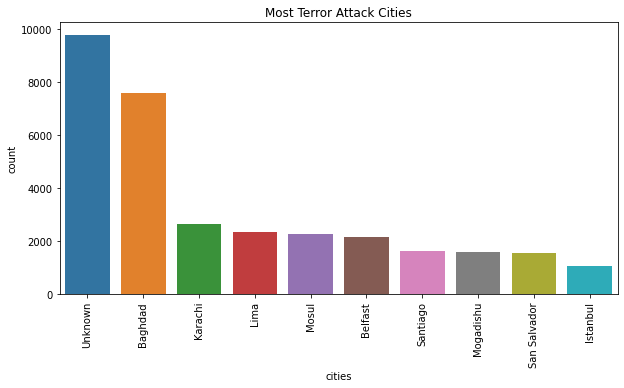

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(ter['city'].value_counts()[:10].index,ter['city'].value_counts()[:10].values)
plt.title("Most Terror Attack Cities")
plt.xlabel("cities")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

### Step 11: Top 20 years with most Terorrist Attack.

In [20]:
print('Year with the most terror attack:\n',ter['Year'].value_counts().head(20))

Year with the most terror attack:
 2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
Name: Year, dtype: int64


C:\Users\Padmakumar\Anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


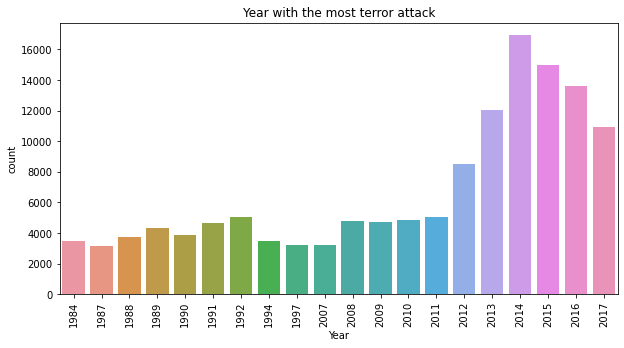

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(ter['Year'].value_counts()[:20].index,ter['Year'].value_counts()[:20].values)
plt.title("Year with the most terror attack")
plt.xlabel("Year")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

### Step 12 : Top 10 Most Frequent Attack Type
.

In [22]:
print("Most Frequent terror attack type :\n",ter['AttackType'].value_counts().head(10))

Most Frequent terror attack type :
 Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64


C:\Users\Padmakumar\Anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


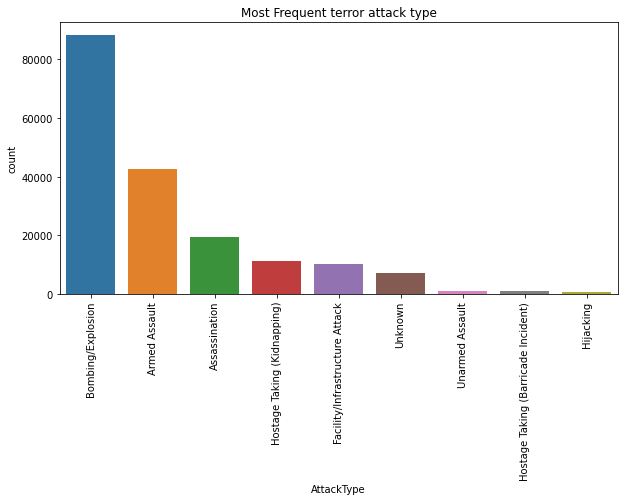

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(ter['AttackType'].value_counts()[:10].index,ter['AttackType'].value_counts()[:10].values)
plt.title("Most Frequent terror attack type")
plt.xlabel("AttackType")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()


### Step 13: Top 5 Groups involved in past Terrorist acitivity.

In [24]:
print(" Group with the most attacks :\n",ter['Group'].value_counts().head(5)) 

 Group with the most attacks :
 Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: Group, dtype: int64


C:\Users\Padmakumar\Anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


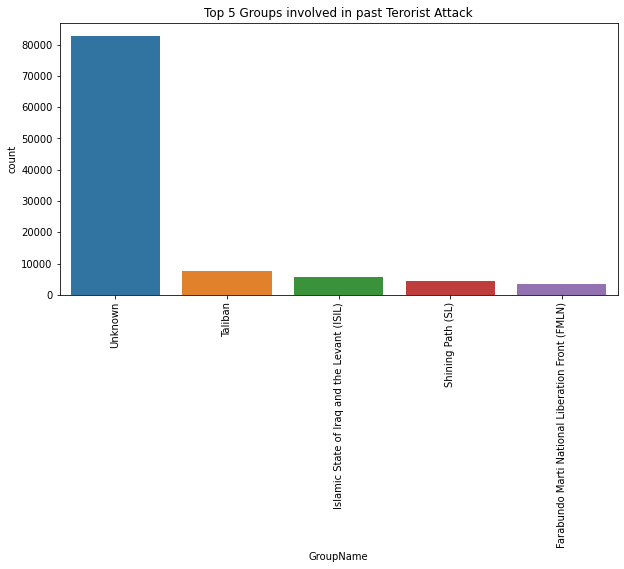

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(ter['Group'].value_counts()[:5].index,ter['Group'].value_counts()[:5].values)
plt.title("Top 5 Groups involved in past Terorist Attack")
plt.xlabel("GroupName")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

### Step 14: Top 10 weapon type used in past terrorist activity.

In [26]:
print(" Top 10 weapon type used in past terrorist activity :\n",ter['weaptype1_txt'].value_counts().head(10)) 

 Top 10 weapon type used in past terrorist activity :
 Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: weaptype1_txt, dtype: int64


C:\Users\Padmakumar\Anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


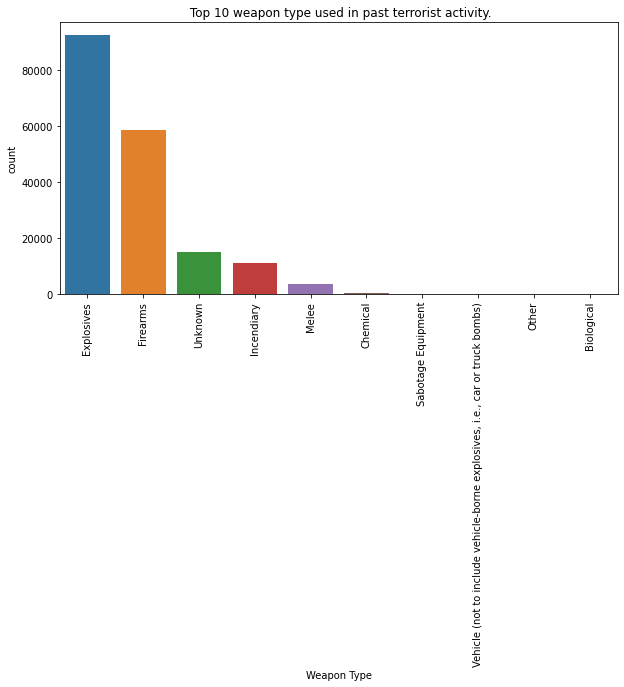

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(ter['weaptype1_txt'].value_counts()[:10].index,ter['weaptype1_txt'].value_counts()[:10].values)
plt.title(" Top 10 weapon type used in past terrorist activity.")
plt.xlabel("Weapon Type")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()


### Step 15: Top 10 Target areas used in terrorist activity

In [28]:
print("Top 10 Targeted areas:\n",ter['targtype1_txt'].value_counts().head(10))

Top 10 Targeted areas:
 Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: targtype1_txt, dtype: int64


C:\Users\Padmakumar\Anaconda3\envs\notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


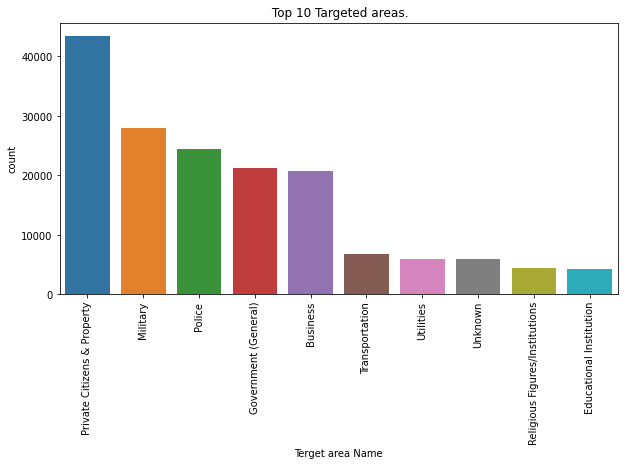

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(ter['targtype1_txt'].value_counts()[:10].index,ter['targtype1_txt'].value_counts()[:10].values)
plt.title(" Top 10 Targeted areas.")
plt.xlabel("Terget area Name")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()


### Step 16: Visualiation Between Killed Vs Wounded.

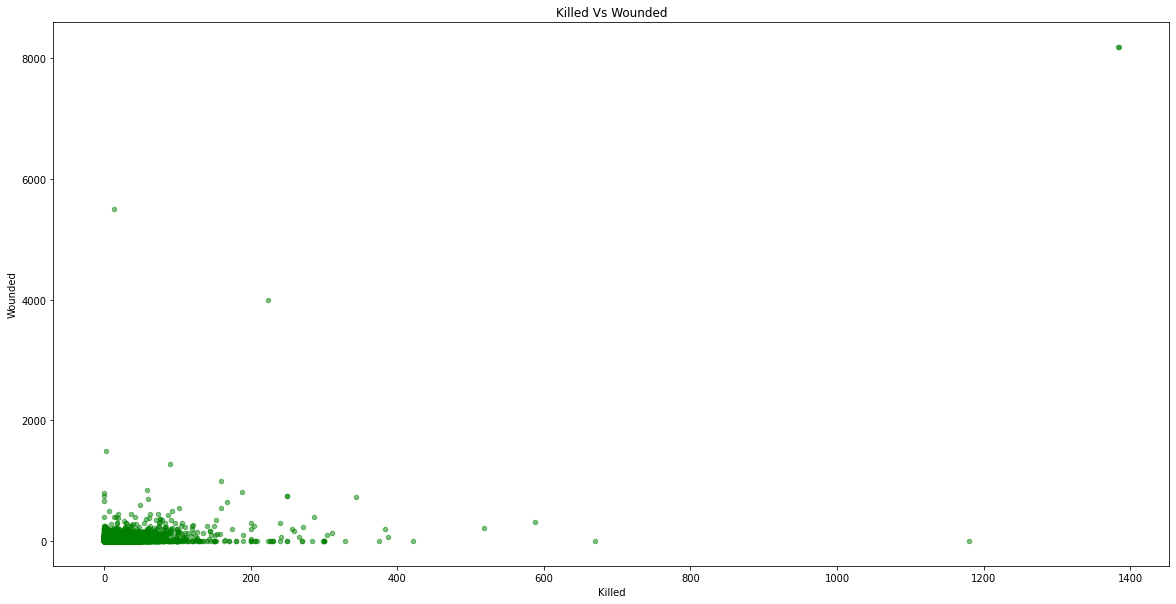

In [30]:
ter.plot(kind='scatter', x='Killed', y='Wound',alpha=0.5,color="green",figsize=(20,10))
plt.title("Killed Vs Wounded")
plt.xlabel("Killed")
plt.ylabel("Wounded")
plt.show()


# Conclusion:

## Hot Zones And year.

### 1. Top five affected countries are Iraq, Pakistan, Afghanistan,India,Colombia.
### 2. Top two affected States are Baghdad, Northern Ireland.
### 3.Top two most affected regions are Middle East & Nort Africa ,South Asia.
### 4. Most affected year in past is 2014 with total 16903 attacks.
### 5. Top 3 targeted areas were Private Citizens & Property ,  Military , Police.  

## Insights drawn:


### 1. The most frequent attack type is Bombing Explosion soo we have to need aleartness in the crowed place.
### 2. The most popular weapon used in the past terrorism is Explosives.
### 3. Frequently unknown group type involved in terrorist attacks followed by Taliban.

## Thank You.
